In [1]:
import sqlite3

In [2]:
db = sqlite3.connect("Employee.sqlite")
db

In [3]:
cur = db.cursor()
cur

In [4]:
cur.execute("create table EmployeeDetail('employeeid' int Primary key,name text,age int,department text,salary int)")

In [5]:
db.commit()

In [6]:
cur.execute("insert into EmployeeDetail values(100,'Rishav',25,'Marketing',50000)")

In [7]:
cur.execute("insert into EmployeeDetail values(101,'Abhishek',26,'Operations',60000)")

In [8]:
cur.execute("insert into EmployeeDetail values(102,'Aman',24,'Human Resource',75000)")

In [10]:
db.commit()

In [11]:
cur.execute("Delete from EmployeeDetail where employeeid = 101")
db.commit()

In [12]:
rem_emp_id = 102
cur.execute("Delete from EmployeeDetail where employeeid = ?",(rem_emp_id,))
db.commit()

##### Q1.)Update SQL Table

In [13]:
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112,113]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000]

values = list(zip(employee_id,name,age,department,salary))
cur.executemany("Insert into EmployeeDetail values(?,?,?,?,?)",values)
db.commit()
db.close()

##### Q2.)Finance Employee SQLite

In [14]:
import sqlite3
db = sqlite3.connect("Employee.sqlite")
cur = db.cursor()

cur.execute("Select employeeid from EmployeeDetail where department ='Finance'")
for i in cur:
    print(i[0])
db.close()

103
107


In [16]:
cur.execute("Delete from EmployeeDetail where employeeid = 100")
db.commit()

In [17]:
import sqlite3
db = sqlite3.connect("Employee.sqlite")
cur = db.cursor()

cur.execute("Select department,count(department) from EmployeeDetail group by department")

for i in cur:
    print(i[0],i[1])


Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


##### Q3.)Count Genre

In [17]:
import sqlite3
import pandas as pd
db = sqlite3.connect("IMDB.sqlite")
data = pd.read_sql_query("Select * from genre",db)
data = data[data["genre"] != ""]
genre = data["genre"].value_counts().index
number = data["genre"].value_counts().values

for i in range(len(genre)):
    print(genre[i],number[i])
db.close()

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Romance 13
Animation 13
Crime 11
Fantasy 7
Mystery 7
History 6
Sport 3
Family 3
Music 3
War 2
Horror 2
Western 2
Musical 1


##### Q4.)IMDB Movie

In [55]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
IMDB = pd.read_sql_query("Select * from IMDB",db)

IMDB_earning = pd.merge(IMDB,earning,on = "Movie_id")


IMDB_earning["Total"] = IMDB_earning["Domestic"]+IMDB_earning["Worldwide"]

highest_earning = IMDB_earning[IMDB_earning["Total"] == max(IMDB_earning["Total"])]

print(highest_earning["Rating"].values[0])

db.close()

8.1


##### Q5.)IMDB Voted

In [63]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

IMDB = pd.read_sql_query("Select * from IMDB",db)

IMDB = IMDB[IMDB["TotalVotes"] == max(IMDB["TotalVotes"])]

print(IMDB["Title"].values[0],IMDB["Rating"].values[0])

db.close()

Inception (2010) 8.8


##### Q6.)IMDB running time

In [95]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

IMDB = pd.read_sql_query("Select * from IMDB",db)

IMDB["Runtime"] = IMDB["Runtime"].str.replace(" min","")

IMDB["Runtime"] = pd.to_numeric(IMDB["Runtime"])

IMDB = IMDB[IMDB["Runtime"] == max(IMDB["Runtime"])]

print(IMDB["Title"].values[0],int(IMDB["Runtime"].values[0]))

db.close()

The Wolf of Wall Street (2013) 180


##### Q7.)IMDB profit

In [120]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
IMDB = pd.read_sql_query("Select * from IMDB",db)

IMDB_earning = pd.merge(IMDB,earning,on = "Movie_id")
IMDB_earning["Budget"].replace("",0,inplace = True)

IMDB_earning["Profit"] = IMDB_earning["Domestic"]+IMDB_earning["Worldwide"]-IMDB_earning["Budget"]


IMDB_earning = IMDB_earning[IMDB_earning["Profit"] == max(IMDB_earning["Profit"])]
print(IMDB_earning["Title"].values[0])

db.close()

Star Wars: The Force Awakens (2015)


##### Q7.)IMDB least budget

In [133]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
IMDB = pd.read_sql_query("Select * from IMDB",db)

IMDB_earning = pd.merge(IMDB,earning,on = "Movie_id")

IMDB_earning = IMDB_earning[IMDB_earning["Budget"] != ""]

IMDB_earning["Profit"] = IMDB_earning["Domestic"]+IMDB_earning["Worldwide"]-IMDB_earning["Budget"]
IMDB_earning = IMDB_earning[IMDB_earning["Budget"] == min(IMDB_earning["Budget"])]
IMDB_earning
IMDB_earning = IMDB_earning[IMDB_earning["Profit"] == max(IMDB_earning["Profit"])]

print(IMDB_earning["Title"].values[0])

db.close()

Short Term 12 (2013)


##### Q8.)IMDB Year Top

In [175]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
IMDB = pd.read_sql_query("Select * from IMDB",db)

IMDB_earning = pd.merge(IMDB,earning,on = "Movie_id")

IMDB_earning["Total"] = IMDB_earning["Domestic"]+IMDB_earning["Worldwide"]

def year(s):
    return int(s[-5:].rstrip(")"))

IMDB_earning["Year"] = IMDB_earning["Title"].apply(year)

years = IMDB_earning["Year"].value_counts().index.sort_values()

for i in years:
    df = IMDB_earning[IMDB_earning["Year"] == i]
    df = df[df["Total"] == max(df["Total"])]
    print(df["Year"].values[0],df["Title"].values[0])


2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


##### Q9.)IMDB genre budget

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


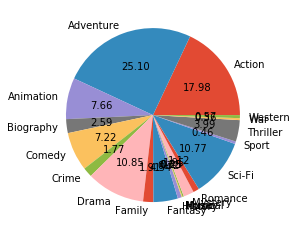

In [64]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
IMDB = pd.read_sql_query("Select * from IMDB",db)
genre = pd.read_sql_query("Select * from genre",db)

genre = genre[genre["genre"] != ""]

IMDB["Budget"] = IMDB["Budget"].replace("",0)


IMDB_genre = pd.merge(IMDB,genre,on = "Movie_id")

total = IMDB_genre["Budget"].sum()


d = IMDB_genre.groupby('genre')['Budget'].sum()

genres = d.index

def per(num):
    per = (num/total)*100
    return format(per,".2f")
l = []
for i in range (len(d)):
    percent = per(d[i])
    print(genres[i],percent)
    l.append(percent)

plt.style.use(["ggplot"])
plt.pie(l,labels = genres,autopct = '%.2f')
plt.show()

##### Q10.)IMDB genre earning

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


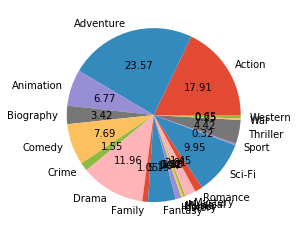

In [66]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
# IMDB = pd.read_sql_query("Select * from IMDB",db)
genre = pd.read_sql_query("Select * from genre",db)

genre = genre[genre["genre"] != ""]

genre_earning = pd.merge(genre,earning,on = "Movie_id")


genre_earning["Total"] = genre_earning["Domestic"]+genre_earning["Worldwide"]

total = genre_earning["Total"].sum()


d = genre_earning.groupby('genre')['Total'].sum()

genres = d.index

def per(num):
    per = (num/total)*100
    return format(per,".2f")
l = []
for i in range (len(d)):
    percent = per(d[i])
    print(genres[i],percent)
    l.append(percent)

plt.style.use(["ggplot"])
plt.pie(l,labels = genres,autopct = '%.2f')
plt.show()

import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
# IMDB = pd.read_sql_query("Select * from IMDB",db)
genre = pd.read_sql_query("Select * from genre",db)

genre = genre[genre["genre"] != ""]

genre_earning = pd.merge(genre,earning,on = "Movie_id")


genre_earning["Total"] = genre_earning["Domestic"]+genre_earning["Worldwide"]

total = genre_earning["Total"].sum()


d = genre_earning.groupby('genre')['Total'].sum()

genres = d.index

def per(num):
    per = (num/total)*100
    return format(per,".2f")
l = []
for i in range (len(d)):
    percent = per(d[i])
    print(genres[i],percent)
    l.append(percent)




##### Q11.)IMDB Specific Genre

In [77]:
import sqlite3
import pandas as pd

db = sqlite3.connect("IMDB.sqlite")

earning = pd.read_sql_query("Select * from earning",db)
IMDB = pd.read_sql_query("Select * from IMDB",db)
genre = pd.read_sql_query("Select * from genre",db)

genre = genre[genre["genre"] != ""]

IMDB_genre = pd.merge(IMDB,genre,on = "Movie_id")

IMDB_genre = IMDB_genre[(IMDB_genre["genre"] == "Sci-Fi") | (IMDB_genre["genre"] == "Mystery")]

IMDB_genre = IMDB_genre[IMDB_genre["Rating"]>=8.0]

print(IMDB_genre["Title"].value_counts().index[0])

Arrival (2016)
